# Домашнее задание: линейная классификация

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Сперва загрузим датасет в Python

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
294,15566689,Female,35,57000,0
87,15631912,Female,28,85000,0
82,15709476,Male,20,49000,0
121,15741049,Male,37,72000,0
48,15727696,Male,30,135000,1


Данный набор данных, содержит информацию о том, покупает ли продукт человек определенного возраста, пола и с определенным доходом или нет.
Нам нужно предсказать, купит ли продукт целевая аудитория или нет.

## Предварительный анализ данных

Очевиндо, что столбец, который соответствует ID пользователя не несет для нас никакой ценной информации. Следовательно, чтобы модель не путалась из-за этого столбца, его следует удалить

In [5]:
# YOUR CODE
data = data.drop(columns=['User ID'])

Посмотрим, есть ли пропущенные значения в датасете

In [6]:
# YOUR CODE
print(data.isnull().sum())

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


> Какие выводы можно сделать о пропущенных значениях? Нужно ли заполнять пропущенные значения? Если нужно, то как?

все четко

Рассмотрим таблицу описательных статистик для датасета

In [7]:
# YOUR CODE
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


> Какие средние значения для каждого признака? Какие среднеквадратичные отклонения? Какие максимальные и минимальные значения?

все видно в табличке

Исследуем набор данных на выбросы с помощью графика
> Какой график отображает медиану, квартили и выбросы? Приведите команду для построения этого графика

любимые боксплоты

<ipython-input-8-fd838ef0f4b5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, y = feature, x = target, ax = axes[i], palette=['skyblue', 'salmon'])
<ipython-input-8-fd838ef0f4b5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, y = feature, x = target, ax = axes[i], palette=['skyblue', 'salmon'])


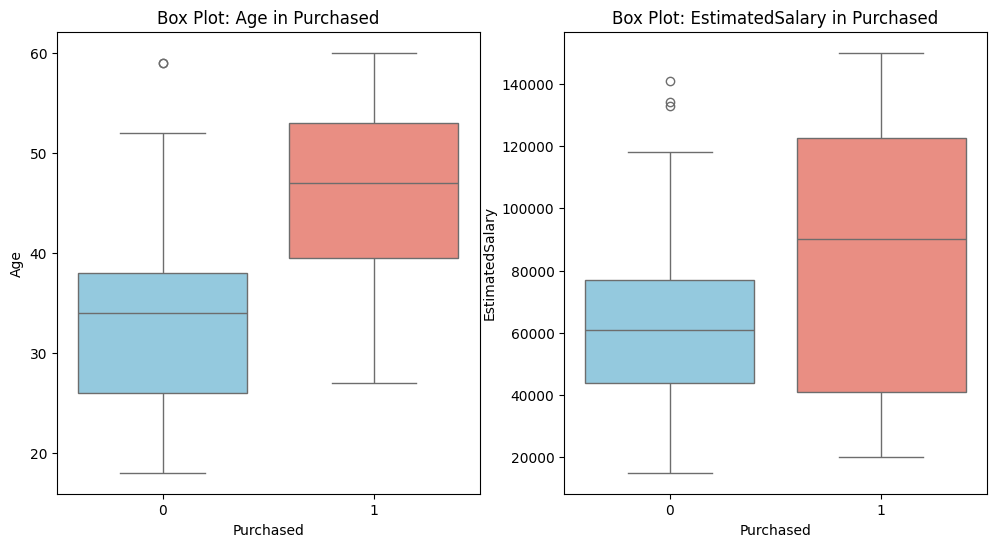

In [8]:
# YOUR CODE
# Hint: если проблемы с масштабом, то можете вывести по отдельности

num_features = ['Age', 'EstimatedSalary']
target = 'Purchased'

fig, axes = plt.subplots(1,2, figsize=(12,6))
for i,feature in enumerate(num_features):
  sns.boxplot(data = data, y = feature, x = target, ax = axes[i], palette=['skyblue', 'salmon'])
  axes[i].set_xlabel(target)
  axes[i].set_ylabel(feature)
  axes[i].set_title(f'Box Plot: {feature} in {target}')
plt.show()

> Какие выводы о наличии аномальных значений можно сделать? Будут ли они сильно влиять на прогнозы модели?

выбросы есть, но их слишком мало, чтобы они существенно повлияли на прогнозы модели

Рассмотрим гистограммы распределений данных

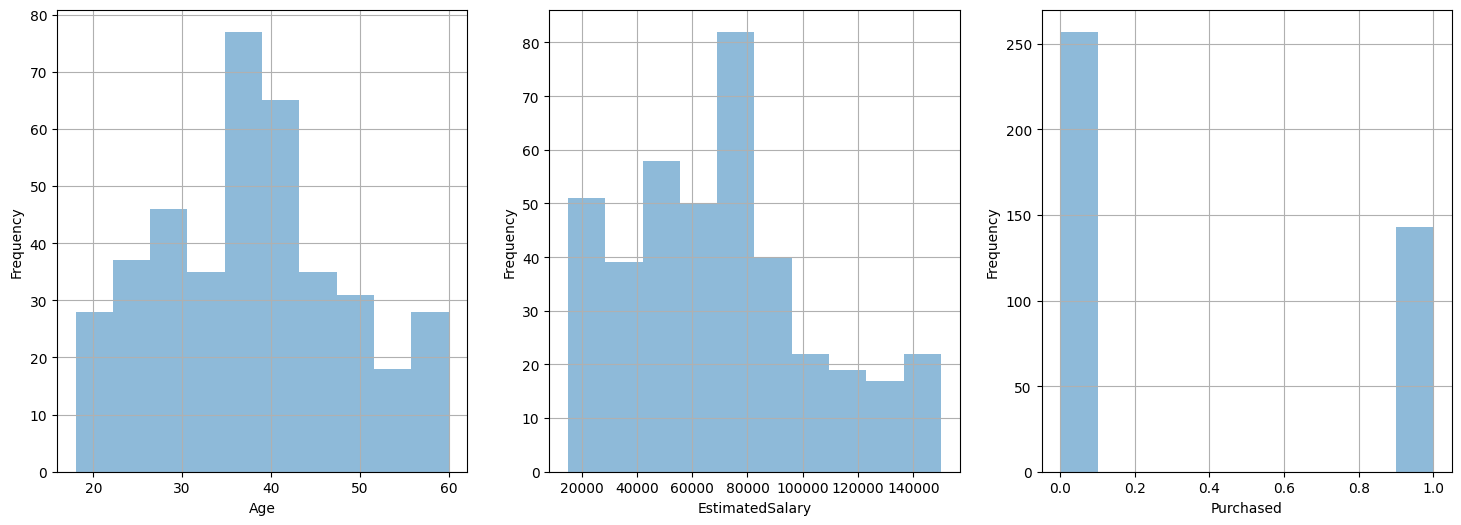

In [9]:
# YOUR CODE
# Hint: лучше выводить по отдельности
all_num_features = num_features + [target]

fig, axes = plt.subplots(1, len(all_num_features), figsize=(18,6))
for i, feature in enumerate(all_num_features):
  subset = data[feature]
  subset.hist(label = feature, ax = axes[i], alpha= 0.5)
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Frequency')
plt.show()

> Какие выводы можно сделать о распределении `Age`? Схоже ли оно с нормальным распределением?

> Какие выводы можно сделать о распределении `EsimatedSalary`? Схоже ли оно с нормальным распределением?

> Какие выводы можно сделать о распределении `Purchased`? Как называется распределение, которому подчиняется эта случайная величина?

распределение age похоже на нормальное;
распределение EstimatedSalary тоже похоже на нормально но уже меньше;
по purchased можно понять что покупается товар реже чем не покупается и что это распределение бернулли

Сделаем еще некоторые предварительные выводы о взаимосвязи целевой переменной `Purchased` с остальными. Например, рассмотрим взаимосвязь `Gender` и `Age` с `Purchased`

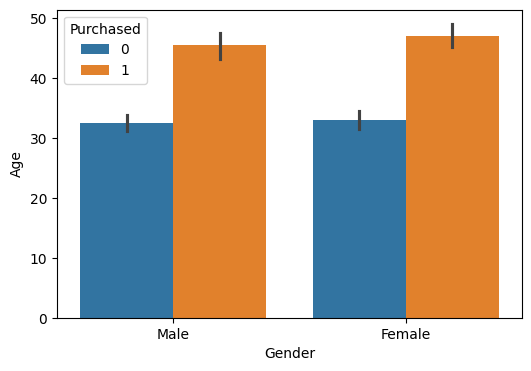

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Gender', y='Age', hue='Purchased')

plt.show()

> Есть ли некоторая статистическая взаимосвязь между возрастом покупателя и совершением покупки?

> Есть ли статистическая разница между группами при совершении покупки?

по графикам видно, что покупка совершается более возрастными покупателями вне зависимости от гендера

Аналогично разделим на две группы по `Gender` и рассмотрим связь между `EstimatedSalary` и `Purchased`

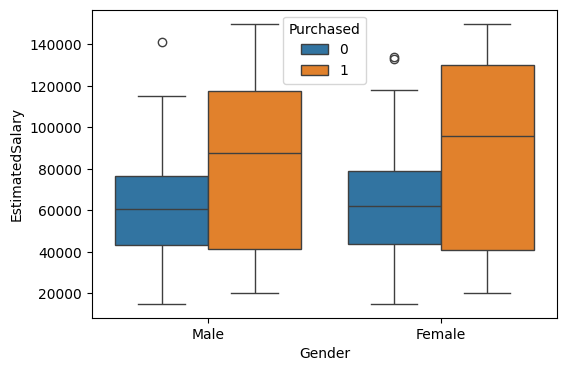

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Gender', y='EstimatedSalary', hue='Purchased')

plt.show()

> Есть ли некоторая статистическая взаимосвязь между запрлатой покупателя и совершением покупки?

> Есть ли статистическая разница между группами при совершении покупки?

отсюда видно что обыно покупку совершают те у кого достаточно высокий доход вне зависимости от гендера

> Подумайте является ли `Gender` значимым фактором или мы можем удалить его?

Из графиков заметно, что ответ на последний вопрос <<не является>>. Следовательно, этот признак можно исключить из модели

In [12]:
# YOUR CODE
data = data.drop(columns = ['Gender'])

В итоге для моделирования у нас остались два значимых признака: `Age` и `EstimatedSalary`. Обозначим признаки за $X$, а целевую переменную за $y$

In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Приняв каждый из признаков за координаты точек в признаковом пространстве, построим график рассеяния с метками классов

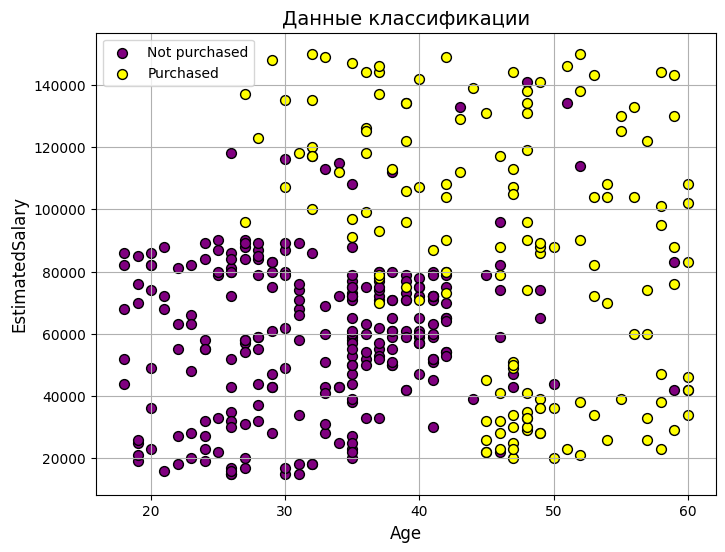

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X[y == 0][:, 0], X[y ==0][:, 1], c='purple', edgecolor='k', s=50, label='Not purchased',
)

scatter = plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1], c='yellow', edgecolor='k', s=50, label='Purchased',
)

plt.title("Данные классификации", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("EstimatedSalary", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Как видно, некоторая четко разделимая взаимосвязь есть.

> Попробуйте объяснить с физической точки зрения, какая взаимосвязь. Как возраст и зарплата в совокупности влияют на совершение покупки

в общем видно что на покупку влияет два файктора: насколько клиент в возрасте или насколько много он зарабатывает, соответстенно в совокупности эти факторы дают аналогичный результат

В качестве последнего этапа стандартизируем нашу выборку, чтобы модели лучше отрабатывали

In [15]:
scaler = StandardScaler()

X = scaler.fit_transform(X)# YOUR CODE

> Нужно ли стандартизировать $y$?

не требуется

Снова построим диаграмму рассеяния, чтобы посмотреть, как изменился результат

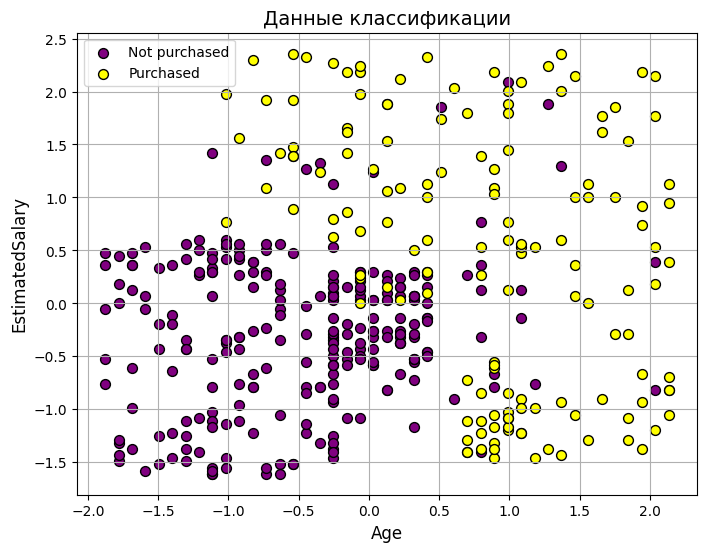

In [16]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X[y == 0][:, 0], X[y ==0][:, 1], c='purple', edgecolor='k', s=50, label='Not purchased',
)

scatter = plt.scatter(
    X[y == 1][:, 0], X[y == 1][:, 1], c='yellow', edgecolor='k', s=50, label='Purchased',
)

plt.title("Данные классификации", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("EstimatedSalary", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

> Что изменилось по сравнению с предыдущим случаем?

как и ожидалось изменились значения параметров, но общая картина нисколько не изменилась

## Построение классификационных моделей

### Логистическая регрессия

Разделим всю выборку на train и test наборы

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)# YOUR CODE

Теперь воспользуемся уже готовой реализацией модели линейной регрессии из библиотеки sklearn

In [18]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

Обучим модель на train выборке

In [19]:
model1.fit(X_train, y_train)
# YOUR CODE

LogisticRegression()

Определим функцию для визуализации разделяющей гиперплоскости

In [20]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Classification result")
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

Построим разделяющую гиперплоскость на всей выборке

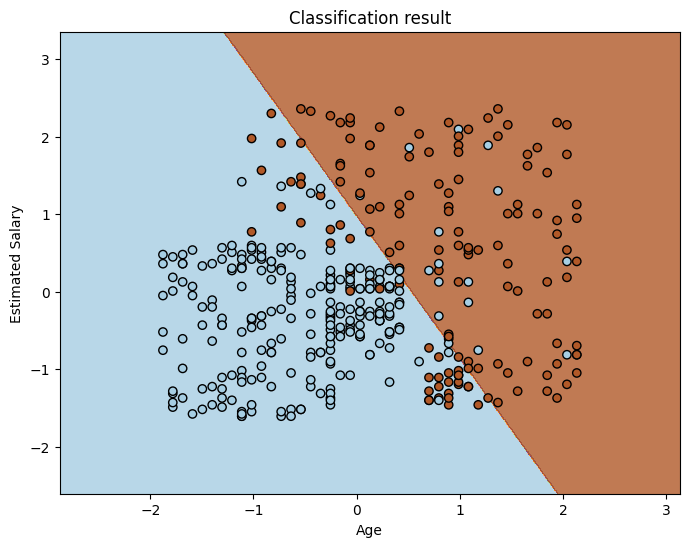

In [21]:
plot_decision_boundary(X, y, model1)

видно что классификация неплохо разделяет объекты но все еще не идеально

> Какие можно сделать выводы о качестве классификации из визуального представления?

Определим метрики классификации

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

И зададим функцию, которая сразу будет возвращать все метрики классификации

In [23]:
def show_metrics(target, predicts):
    confusion = confusion_matrix(target, predicts)
    accuracy = accuracy_score(target, predicts)
    precision = precision_score(target, predicts)
    recall = recall_score(target, predicts)

    print('=====================================')
    print(f'Confusion matrix : \n{confusion}')
    print('=====================================')
    print(f'Accuracy : {accuracy}')
    print('=====================================')
    print(f'Recall_Score : {recall}')
    print('=====================================')
    print(f'Precision Score : {precision}')

Вычислим значения метрик классификации на обучающей и тестовой выборках

In [24]:
y_hat = model1.predict(X_train)# YOUR CODE

show_metrics(y_train, y_hat)

Confusion matrix : 
[[179  15]
 [ 34  72]]
Accuracy : 0.8366666666666667
Recall_Score : 0.6792452830188679
Precision Score : 0.8275862068965517


In [25]:
y_pred = model1.predict(X_test) # YOUR CODE

show_metrics(y_test, y_pred)

Confusion matrix : 
[[61  2]
 [12 25]]
Accuracy : 0.86
Recall_Score : 0.6756756756756757
Precision Score : 0.9259259259259259


> Какие выводы можно сделать о результате классификации?

по итогу можно увидеть, что и для тренировочных данных и для тестовых у нас очень посредственный recall_score и сильно различаются precision_score
и если в двух словах то точность пока хромает

### Метод опорных векторов (линейный)

Проделяем все аналогичные действия для модели опорных векторов

In [26]:
from sklearn.svm import LinearSVC

model2 = LinearSVC()

Обучим модель на train выборке

In [27]:
# YOUR CODE
model2.fit(X_train, y_train)

LinearSVC()

Построим разделяющую гиперплоскость на всей выборке

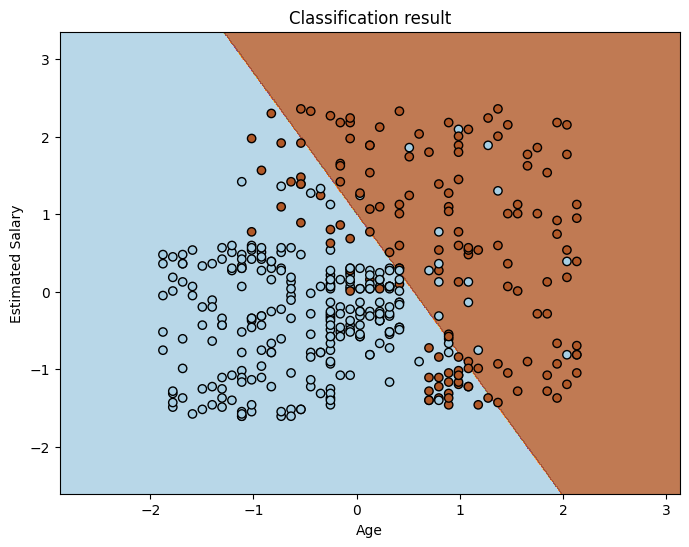

In [28]:
plot_decision_boundary(X, y, model2)

> Какие можно сделать выводы о качестве классификации из визуального представления? Есть ли кардинальные отличия по сравнению с логистической моделью?

результат не особо отличается от того что мы получали ранее с логистической регрессией

Вычислим значения метрик классификации на обучающей и тестовой выборках

In [29]:
y_hat = model2.predict(X_train)# YOUR CODE

show_metrics(y_train, y_hat)

Confusion matrix : 
[[179  15]
 [ 36  70]]
Accuracy : 0.83
Recall_Score : 0.660377358490566
Precision Score : 0.8235294117647058


In [30]:
y_pred = model2.predict(X_test)# YOUR CODE

show_metrics(y_test, y_pred)

Confusion matrix : 
[[61  2]
 [12 25]]
Accuracy : 0.86
Recall_Score : 0.6756756756756757
Precision Score : 0.9259259259259259


> Какие выводы можно сделать о результате классификации? Стали ли метрики лучше по сравнению с логистической моделью или наоборот ухудшились?

результат не изменился по сравнению с предыдущим

### Метод опорных векторов (с ядром)

Здесь мы воспользуемся уже [готовой реализацией из sklearn](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)

In [31]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(
    clf, X, y, ax=None, support_vectors=True,
):

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 8))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f" Decision boundaries of SVC")

    if ax is None:
        plt.show()

Далее обучим модель с линейным ядром (то же самое, что и в предыдущем случае)

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


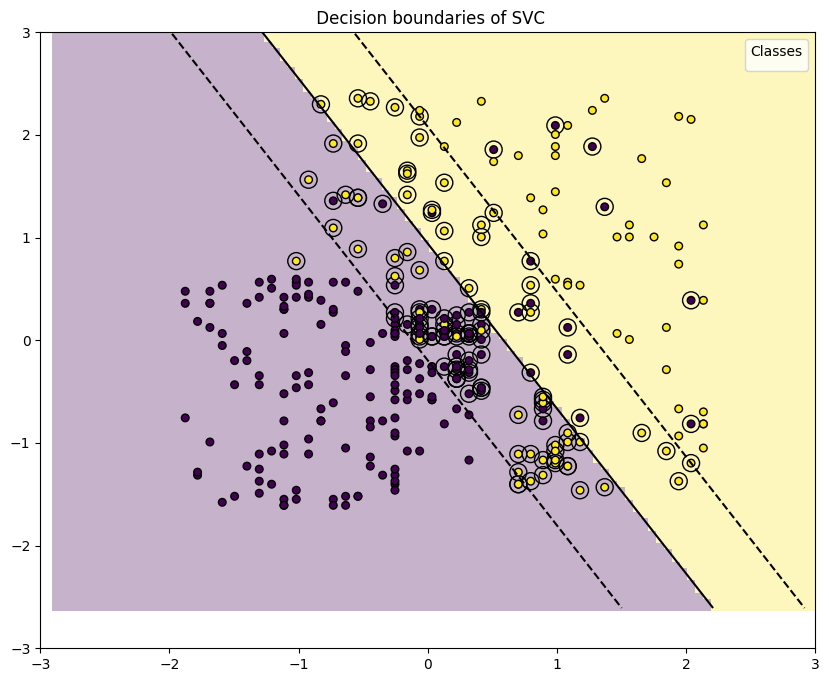

In [32]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Еще раз рассмотрим метрики на тестовом наборе, чтобы убедиться в том, что прошлый классификатор действительно имеет линейное ядро

In [33]:
y_pred = clf.predict(X_test)# YOUR CODE

show_metrics(y_test, y_pred)

Confusion matrix : 
[[61  2]
 [12 25]]
Accuracy : 0.86
Recall_Score : 0.6756756756756757
Precision Score : 0.9259259259259259


Теперь построим классификатор с полиномиальным ядром.

Из документации SVC:
- `degreeint, default=3`

Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

Под этим понимается, что по стандарту модель использует полиномиальное ядро третьей степени

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


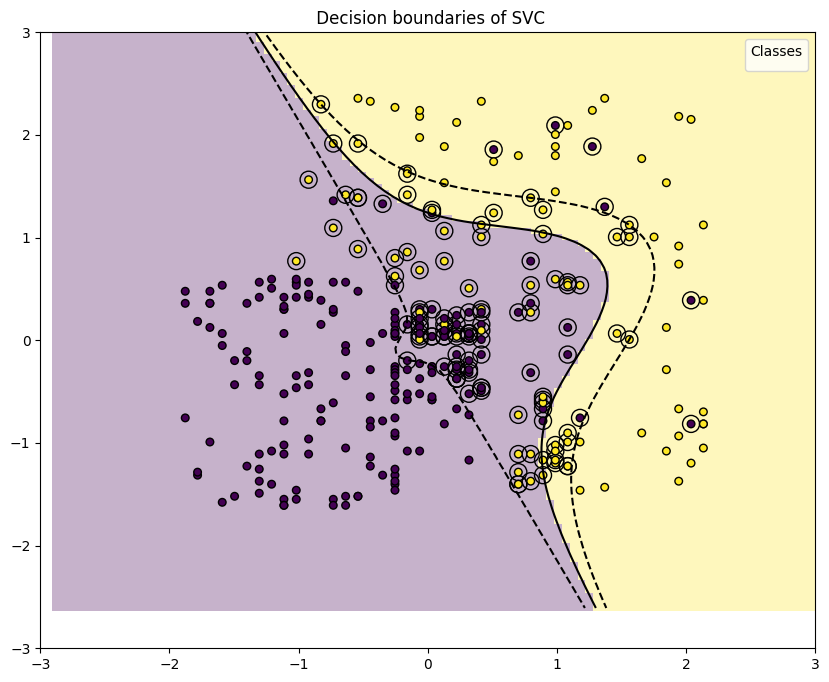

In [34]:
clf = svm.SVC(kernel='poly').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Рассмотирм метрики на тестовом наборе

In [35]:
y_pred = clf.predict(X_test)# YOUR CODE

show_metrics(y_test, y_pred)

Confusion matrix : 
[[63  0]
 [14 23]]
Accuracy : 0.86
Recall_Score : 0.6216216216216216
Precision Score : 1.0


> Есть ли изменения в метриках? Что стало лучше, что стало худше? Что можно в целом сказать о модели: стала ли она качественнее классифицировать данные?

есть положительная динамика, стал лучше precision, recoll стал чуть хуже, а accuracy остался тем же.
по итогу можно сказать что модель стала лучше классифицировать данные

Теперь построим модель с использованием гауссовского ядра

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


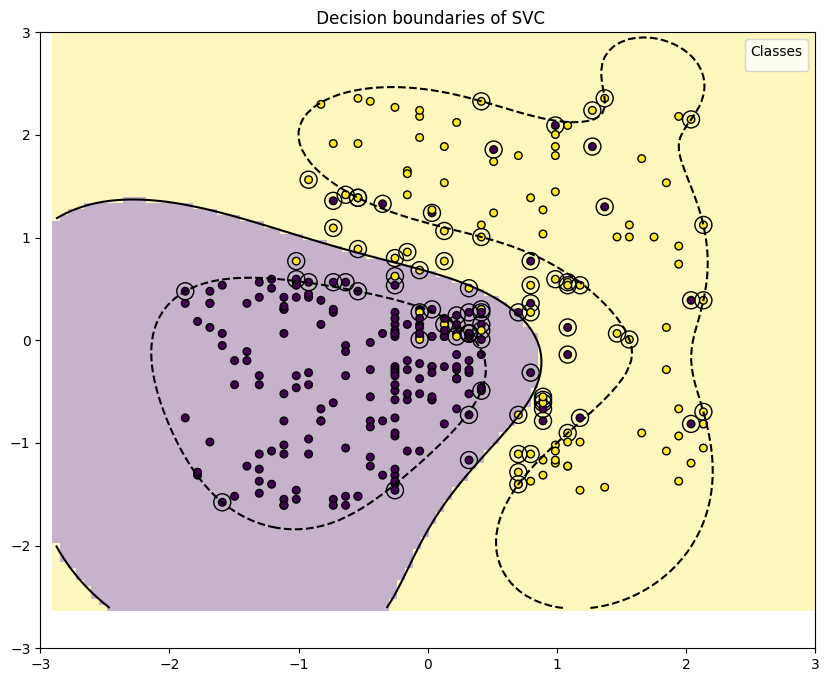

In [36]:
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)

plot_training_data_with_decision_boundary(clf, X_train, y_train)

Рассмотирм метрики на тестовом наборе

In [37]:
y_pred = clf.predict(X_test)# YOUR CODE

show_metrics(y_test, y_pred)

Confusion matrix : 
[[57  6]
 [ 1 36]]
Accuracy : 0.93
Recall_Score : 0.972972972972973
Precision Score : 0.8571428571428571


In [39]:
#метрики на обучающем наборе данных
y_hat = clf.predict(X_train)
show_metrics(y_train, y_hat)

Confusion matrix : 
[[176  18]
 [ 11  95]]
Accuracy : 0.9033333333333333
Recall_Score : 0.8962264150943396
Precision Score : 0.8407079646017699


> Есть ли изменения в метриках? Что стало лучше, что стало худше? Что можно в целом сказать о модели: стала ли она качественнее классифицировать данные?

> Проведите сравнительный анализ всех моделей между собой

есть существенные изменения: метрики стали значительно лучше, однако немного упал precision, но общая картина говорит о том, что модель успешно классифифцирует данные в большинстве случаев.
таким образом из всех моделей самой успешной оказалась та, что была построена по методу опорных векторов с гауссовским ядром.

## Выводы

Таким образом, лучшей моделью (по вашему мнению) для решения задачи классификации покупательского спроса является модель -- SVM с гауссовским ядром.

Она имеет следующие метрики:
- На Обучающем наборе
- - Accuracy : 0.9033333333333333
  - Precision : 0.8407079646017699
  - Recall : 0.8962264150943396
- На Тестовом наборе
- - Accuracy : 0.93
  - Precision : 0.8571428571428571
  - Recall : 0.972972972972973

Стоит понимать, что это не столько эталонный анализ, сколько базовый минимум. Вспомним, что в моделях также присутствуют гиперпараметры (например, регуляризация). По стандарту в моделях стоит значение $\lambda = 1$ для $L_2$ регуляризационного слагаемого. С помощью кросс-валидации по сетке можно было бы подобрать такой гиперпараметр, при котором результат классификации был бы лучше.

> По желанию можете попробовать реализовать кросс-валидацию по сетке значений гиперпараметра для логистической регрессии и линейной SVM. Попробуйте сравнить результаты